This is the given problem.

<img src="book2_img1.png">

On solving above question we recieve this posterior distribution.

<img src="book2_img2.png">

We know that in Gibbs sampling we keep all other parameter constant in posterior distribution, while determing the distribution other parameter.

<img src="book2_img3.png">

In [1]:
update_mu = function(n, ybar, sig2, mu_0, sig2_0) 
{
  sig2_1 = 1.0 / (n / sig2 + 1.0 / sig2_0)
  mu_1 = sig2_1 * (n * ybar / sig2 + mu_0 / sig2_0)
  rnorm(n=1, mean=mu_1, sd=sqrt(sig2_1))
}

<img src="book2_img4.png">

In [2]:
update_sig2 = function(n, y, mu, nu_0, beta_0) 
{
  nu_1 = nu_0 + n / 2.0
  sumsq = sum( (y - mu)^2 ) # vectorized
  beta_1 = beta_0 + sumsq / 2.0
  out_gamma = rgamma(n=1, shape=nu_1, rate=beta_1) # rate for gamma is shape for inv-gamma
  1.0 / out_gamma # reciprocal of a gamma random variable is distributed inv-gamma
}

In [3]:
gibbs = function(y, n_iter, init, prior) 
{
  ybar = mean(y)
  n = length(y)
  
  ## initialize
  mu_out = numeric(n_iter)
  sig2_out = numeric(n_iter)
  
  mu_now = init$mu
  
  ## Gibbs sampler
  for (i in 1:n_iter) {
    sig2_now = update_sig2(n=n, y=y, mu=mu_now, nu_0=prior$nu_0, beta_0=prior$beta_0)
    mu_now = update_mu(n=n, ybar=ybar, sig2=sig2_now, mu_0=prior$mu_0, sig2_0=prior$sig2_0)
    
    sig2_out[i] = sig2_now
    mu_out[i] = mu_now
  }
  
  cbind(mu=mu_out, sig2=sig2_out)
}

In [4]:
y =  c(-0.2, -1.5, -5.3, 0.3, -0.8, -2.2)
ybar = mean(y)
n = length(y)

In [5]:
prior = list()

prior$mu_0 = 0.0
prior$sig2_0 = 1.0

prior$n_0 = 2.0 # prior effective sample size for sig2
prior$s2_0 = 1.0 # prior point estimate for sig2

prior$nu_0 = prior$n_0 / 2.0 # prior parameter for inverse-gamma
prior$beta_0 = prior$n_0 * prior$s2_0 / 2.0 # prior parameter for inverse-gamma

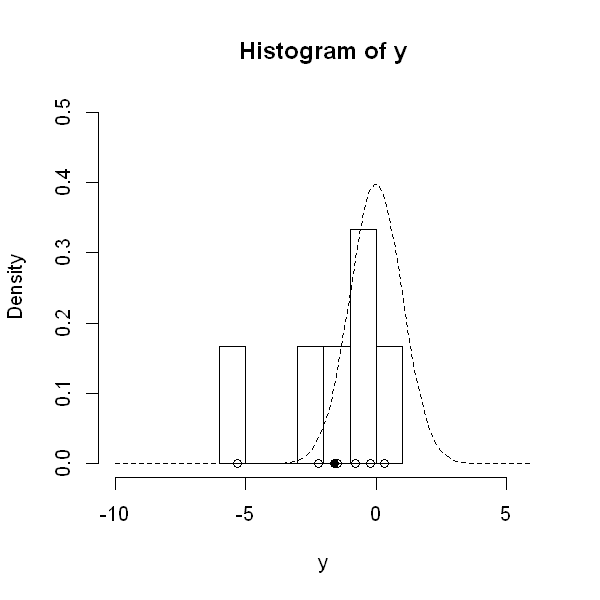

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)

hist(y, freq=FALSE, xlim=c(-10.0, 6.0), ylim=c(0,0.5)) # histogram of the data
curve(dnorm(x=x, mean=prior$mu_0, sd=sqrt(prior$sig2_0)), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [7]:
set.seed(53)

init = list()
init$mu = 0.0

post = gibbs(y=y, n_iter=5*1e3, init=init, prior=prior)

In [8]:
mean(post[,1])

[1] -0.9975869

In [9]:
print(head(post))
print(tail(post))

             mu     sig2
[1,] -1.7858026 4.885669
[2,] -1.9606294 2.334663
[3,] -2.0428863 5.305703
[4,] -0.5855074 3.276606
[5,] -0.7150840 4.507891
[6,] -0.3960046 4.094219
                mu     sig2
[4995,]  0.3001707 3.455744
[4996,] -0.9282518 5.303145
[4997,] -2.6937376 1.996002
[4998,] -0.5709325 4.104430
[4999,] -1.2900845 3.127013
[5000,] -1.0584168 2.058387


In [10]:
library("coda")

Warning message:
"package 'coda' was built under R version 3.4.4"

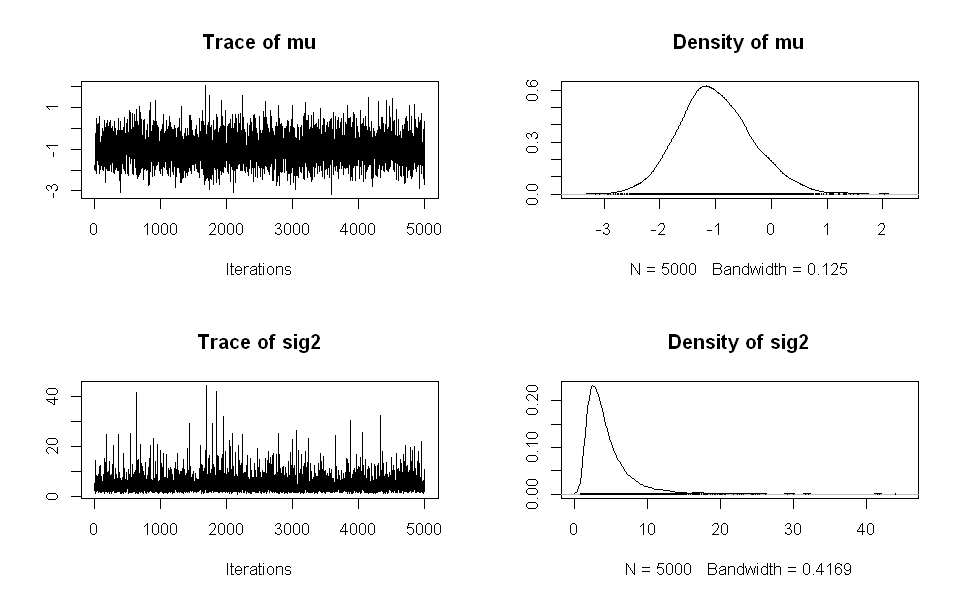

In [11]:
options(repr.plot.width = 8, repr.plot.height = 5)

plot(as.mcmc(post))

In [12]:
summary(as.mcmc(post))


Iterations = 1:5000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
mu   -0.9976 0.6624 0.009368        0.01015
sig2  4.5219 3.2775 0.046352        0.05135

2. Quantiles for each variable:

       2.5%    25%    50%     75%   97.5%
mu   -2.218 -1.444 -1.042 -0.5762  0.4013
sig2  1.419  2.506  3.596  5.4003 13.0080
